# About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Type of Problem :

The above problem is a clear classification problem as we need to classify whether the Loan_Status is yes or no. So this can be solved by any of the classification techniques like

Logistic Regression .

Decision Tree Algorithm.

Random Forest Technique.


Discription about the data.

There are 2 data sets that are given. One is training data and one is testing data. It’s very useful to know about the data columns before getting in to the actual problem for avoiding confusion at a later state. Now let us understand the data columns (that has been already given by the company itself ) first so that we will get a glance.

### EDA Analysis ###########

## Why are we doing EDA(Exploratory Data Analysis)
Well in some cases we can easily come to conclusion if we just to do EDA. Then there is no necessary for going through next models.

In [7]:
##EDA THROUGH PYTHON
##Now let me  imported the necessary packages like pandas, numpy, seaborn etc. so that i can carry the necessary operations further.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [8]:
##  I am going to upload or read the files/data-sets using pandas. For this we used read_csv ####

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
#Let me get the top 5 values. We can get using the head function. Hence the code would be train.head(5).
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#train.columns would give the list of columns of data-set train.
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
#train.shape gives the number of rows and columns.
train.shape

(614, 13)

Now let us analyse the data using single variable.

In [13]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [20]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

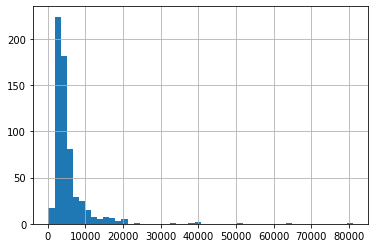

In [23]:
train['ApplicantIncome'].hist(bins=50)

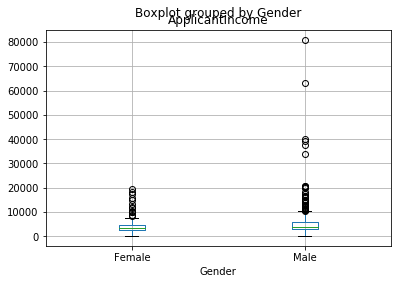

In [24]:
train.boxplot(column='ApplicantIncome', by = 'Gender')

In [25]:
#acc to above output, there are more men with more income


# Conclusions: (Through Single Variable Analysis)
We can see that approximately 81% are Male and 19% are female.
Percentage of applicants with no dependents is higher.
There are more number of graduates than non graduates.
Semi Urban people is slightly higher than Urban people among the applicants.
Larger Percentage of people have a good credit history.
The percentage of people that the loan has been approved has been higher rather than the percentage of applicant for which the loan has been declined.

Now let's try some different approaches to this problem. As our main target is Loan_Status Variable , let us try to find if Applicant income can exactly separate the Loan_Status. Suppose if i can find that if applicant income is above some X amount then Loan Status is yes .Else it is No. Firstly I am trying to plot the distribution plot based on Loan_Status.

In [26]:
#seaborn.FacetGrid Multi-plot grid for plotting conditional relationships.


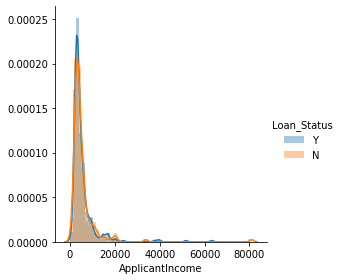

In [27]:
sns.set_style = {'whitegrid'};

sns.FacetGrid(train,hue='Loan_Status',size= 4).map(sns.distplot,"ApplicantIncome").add_legend();

plt.show()

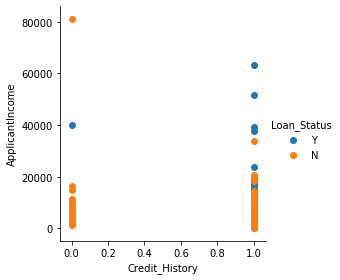

In [28]:
sns.set_style = {'whitegrid'};

sns.FacetGrid(train,hue='Loan_Status',size= 4).map(plt.scatter,"Credit_History","ApplicantIncome").add_legend();

plt.show()

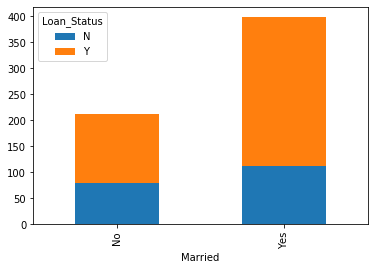

In [29]:
##Ccross tab plot
ct = pd.crosstab(train.Married,train.Loan_Status)
ct.plot.bar(stacked=True)
plt.legend(title='Loan_Status')


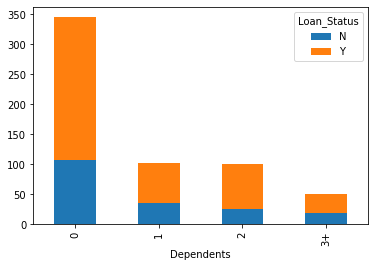

In [30]:
##Ccross tab plot
ct = pd.crosstab(train.Dependents,train.Loan_Status)
ct.plot.bar(stacked=True)
plt.legend(title='Loan_Status')


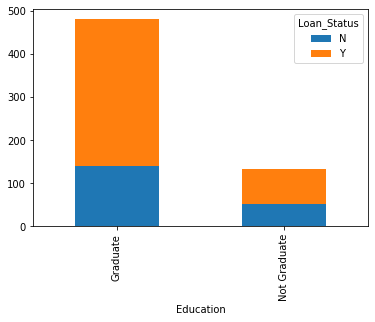

In [31]:
##Ccross tab plot
ct = pd.crosstab(train.Education,train.Loan_Status)
ct.plot.bar(stacked=True)
plt.legend(title='Loan_Status')


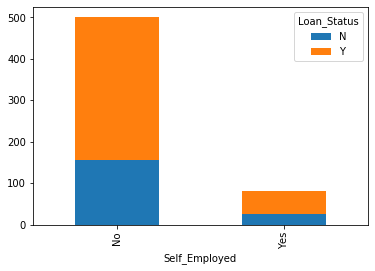

In [32]:
##Ccross tab plot
ct = pd.crosstab(train.Self_Employed,train.Loan_Status)
ct.plot.bar(stacked=True)
plt.legend(title='Loan_Status')


###DATA CLEANING AND STRUCTURING

Before we go for modeling the data, we have to check whether the data is cleaned or not. And after cleaning part, we have to structure the Data. For cleaning part, First I have to check whether there exists any missing values. For that I am using the code snippet isnull()

In [33]:
#Checking for null value and missing value
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
#we have observed that there is many null values and missing values in the data set . NOw we are going to replace all the null and missing value by medians.
#Replacing null value

train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)



In [35]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
#to fill the missing values by mean 
train['LoanAmount'] = train.LoanAmount.fillna(train.LoanAmount.mean())
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.855049
std,6109.041673,2926.248369,84.037468,65.12041,0.352339
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [37]:
se = train['Self_Employed'].value_counts(ascending=True)
se.head()

Yes     82
No     532
Name: Self_Employed, dtype: int64

In [38]:
#since *no* has ~82% so, we will fill the missing values of this column with "no"
train.Self_Employed = train.Self_Employed.fillna('No')
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.855049
std,6109.041673,2926.248369,84.037468,65.12041,0.352339
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


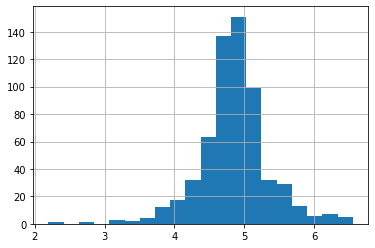

In [39]:
#log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins= 20)

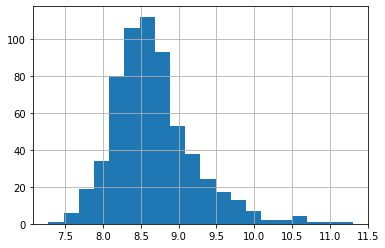

In [40]:
#to decrease the extreme values of ApplicantIncome (which can be ssen from the previous barplot), we can add CoApplicantIncome to compensate the value 
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins= 20)

In [41]:
#capacity of each applicant of how well he/she is suited to pay back his loan.

train['Capacity%'] = ((train['LoanAmount']/train['TotalIncome'])*100).astype(float)
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,2.503200
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,2.350000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872,2.777489
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569,2.468174
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750,2.851986
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305,3.036876
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819,1.465832


In [42]:
#male areount 80% so will fill the missing value with "Male"
train.Gender = train['Gender'].fillna('Male')

In [43]:
gen= train['Gender'].value_counts(ascending = True)
gen.head()

Female    112
Male      502
Name: Gender, dtype: int64

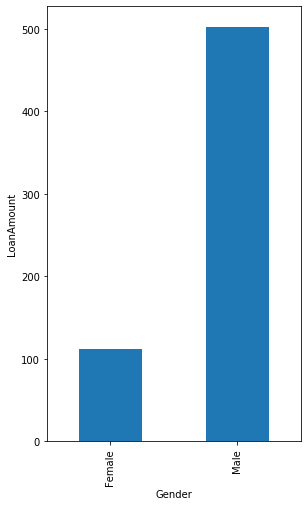

In [44]:
#which gender has more loan amount
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Gender')
ax1.set_ylabel('LoanAmount')

gen.plot(kind='bar')

In [45]:
Md= train['Married'].value_counts(ascending = True)
Md.head()

No     213
Yes    401
Name: Married, dtype: int64

In [46]:
#yes has 65%
#filling the missing value with yes which is married.
train.Married = train['Married'].fillna('Yes')

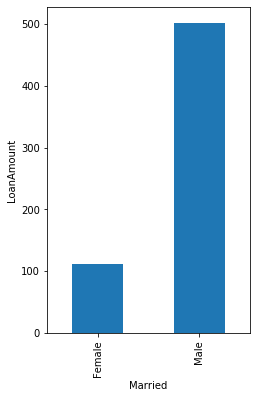

In [47]:
#which Married person  has more loan amount
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Married')
ax1.set_ylabel('LoanAmount')

gen.plot(kind='bar')

In [48]:
Loan = train['Loan_Status'].value_counts(ascending = True)
Loan.head()

N    192
Y    422
Name: Loan_Status, dtype: int64

In [49]:
train.Loan_Status = train.Loan_Status.fillna('1')
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
count,614.000000,614.000000,614.000000,600.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.855049,4.862066,7024.705081,8.669414,2.401664
std,6109.041673,2926.248369,84.037468,65.12041,0.352339,0.496575,6458.663872,0.545102,0.894732
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225,1442.000000,7.273786,0.252292
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4.607658,4166.000000,8.334712,1.936150
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,4.859812,5416.500000,8.597205,2.417435
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,5.104426,7521.750000,8.925549,2.834513
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080,81000.000000,11.302204,8.271164


In [50]:
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
Capacity%            False
dtype: bool

In [51]:
CH = train['Credit_History'].value_counts(ascending = True)
CH.head()

0.0     89
1.0    525
Name: Credit_History, dtype: int64

In [52]:
train.Credit_History = train.Credit_History.fillna('1.0')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,2.503200
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,2.350000


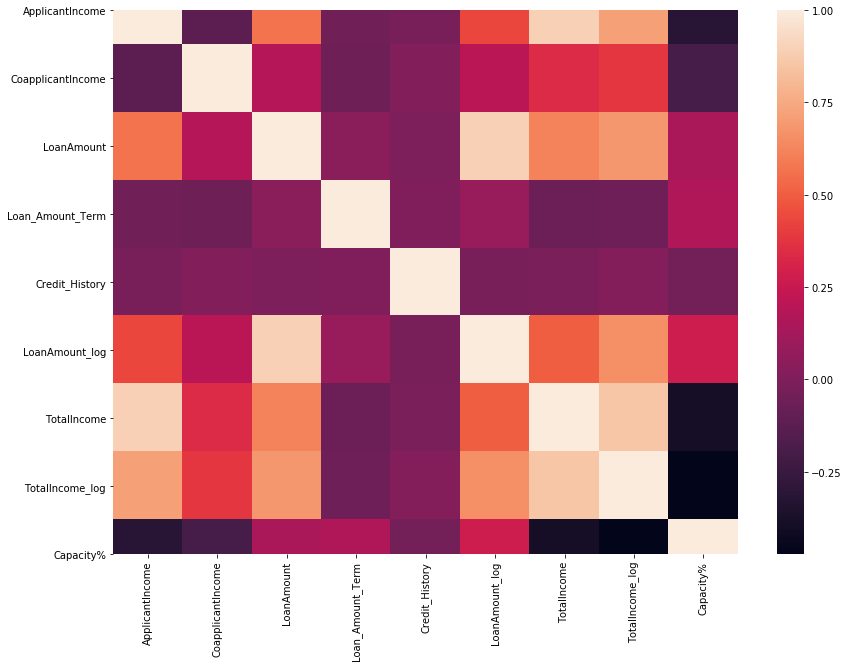

In [53]:
f = plt.subplots(1, 1, figsize = (14,10))
corr = train.corr()
sns.heatmap(corr)

In [54]:
#Building predictive Modeling ::::
#here we use SKlearn  for which we need to convert the categorical valuesin to numerical values.

from sklearn.preprocessing import LabelEncoder
var_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder() #Encode labels with value between 0 and n_classes-1.


for i in var_col:
    train[i] = le.fit_transform(train[i])#Fit label encoder and return encoded labels

train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Capacity%            float64
dtype: object

In [55]:
train2 = train.drop('Loan_ID',axis =1)
test2 = test.drop('Loan_ID',axis=1)

In [56]:
X = train2.drop('Loan_Status',1)
y = train2.Loan_Status

In [57]:
X.shape

(614, 15)

In [58]:
y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [59]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,4.986426,5849.0,8.674026,2.503200
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,4.852030,6091.0,8.714568,2.101461
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,4.189655,3000.0,8.006368,2.200000
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,4.787492,4941.0,8.505323,2.428658
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,4.948760,6000.0,8.699515,2.350000


In [2]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold ,GridSearchCV,cross_val_score  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [3]:
#Generic function for making a classification model and accessing performance:
def classification_model(model,data,prediction_input,output):
      model.fit(data[prediction_input],data[output])
      predictions = model.predict(data[prediction_input])
      accuracy = metrics.accuracy_score(predictions,data[output])
      print("Accuracy : %s" % "{0:.3%}".format(accuracy))
      kf = KFold(n_splits=5)
      error = []
      for train, test in  kf.split(data):
          train_X = (data[prediction_input].iloc[train,:])
          train_y = data[output].iloc[train]
          model.fit(train_X, train_y)
          test_X=data[prediction_input].iloc[test,:]
          test_y=data[output].iloc[test]
          error.append(model.score(test_X,test_y))
      print('Cross_Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))
classification_model(model, train, predictor_var, outcome_var)

NameError: name 'model' is not defined

In [ ]:
#using Logistic reasoning 
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,train,predictor_var,outcome_var)

In [67]:
#using Logistic reasoning 
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross_Validation Score : 80.946%


In [68]:
#using Dession tree 
model = DecisionTreeClassifier()
predictor_var=['Credit_History','Gender','Married','Education']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross_Validation Score : 80.946%


In [69]:
model =DecisionTreeClassifier()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross_Validation Score : 68.245%


In [70]:
#using Random forest
model =RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross_Validation Score : 78.834%


In [71]:
#using Random Forest 
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 69.544%
Cross_Validation Score : 66.771%


I have tried various techniques like Random Forest, Decision Tree, Decision Tree etc. and came to conclusion that the above code gave maximum accuracy. However there is still a lot of room to enhance accuracy which I have to figure it out still.